# **Classification Takeaway Assignment**

Import necessary libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from imblearn.over_sampling import SMOTE

Load the dataset

In [105]:
df = pd.read_csv('Dataset of Diabetes .csv')

## Exploratory Data Analysis

In [106]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Check for null values

In [108]:
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [109]:
print(df['CLASS'].value_counts())

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [110]:
df['CLASS'] = df['CLASS'].str.strip() #making sure there are only 3 classes

In [111]:
print(df['CLASS'].unique())

['N' 'P' 'Y']


Text(0.5, 0, 'Diabetic Class')

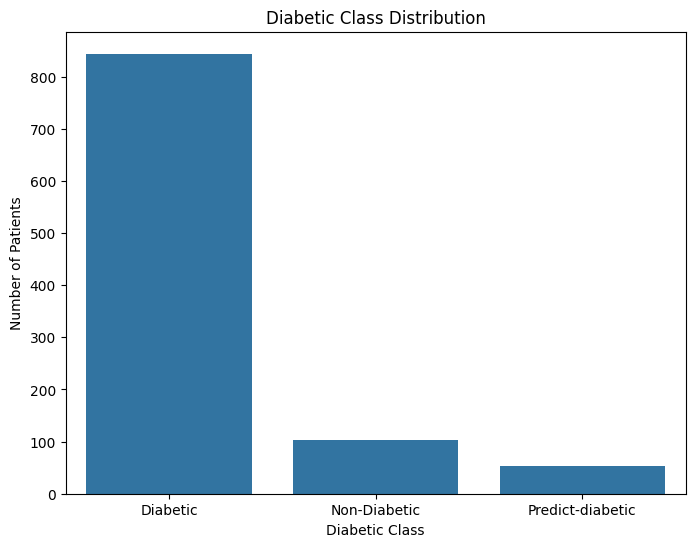

In [112]:
class_dist = df['CLASS'].value_counts()
class_dist = class_dist.rename({"Y":"Diabetic", "P":"Predict-diabetic", "N":"Non-Diabetic"})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Diabetic Class Distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Diabetic Class")

In [113]:
print(df['Gender'].value_counts())

Gender
M    565
F    434
f      1
Name: count, dtype: int64


In [114]:
df['Gender'] = df['Gender'].str.upper()

In [115]:
print(df['Gender'].unique())

['F' 'M']


In [116]:
le = LabelEncoder()

# Fit and transform the categorical data
df['Gender']= le.fit_transform(df['Gender'])
df['CLASS']= le.fit_transform(df['CLASS'])

In [117]:
df.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


In [118]:
df.drop(columns=['ID','No_Pation'])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


Text(0.5, 1.0, 'Correlation Heatmap')

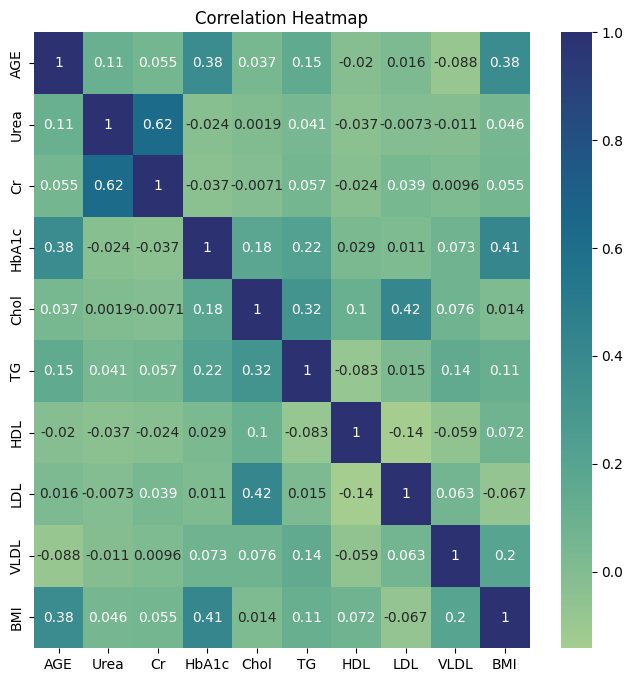

In [119]:
attribute_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol','TG', 'HDL', 'LDL', 'VLDL', 'BMI']
corr_matrix = df[attribute_columns].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest' )
plt.title('Correlation Heatmap')

In [120]:
diabetic_patients = df.loc[df["CLASS"] == 2]
non_diabetic_patients = df.loc[df["CLASS"] == 0]
predict_diabetic_patients = df.loc[df["CLASS"] == 1]

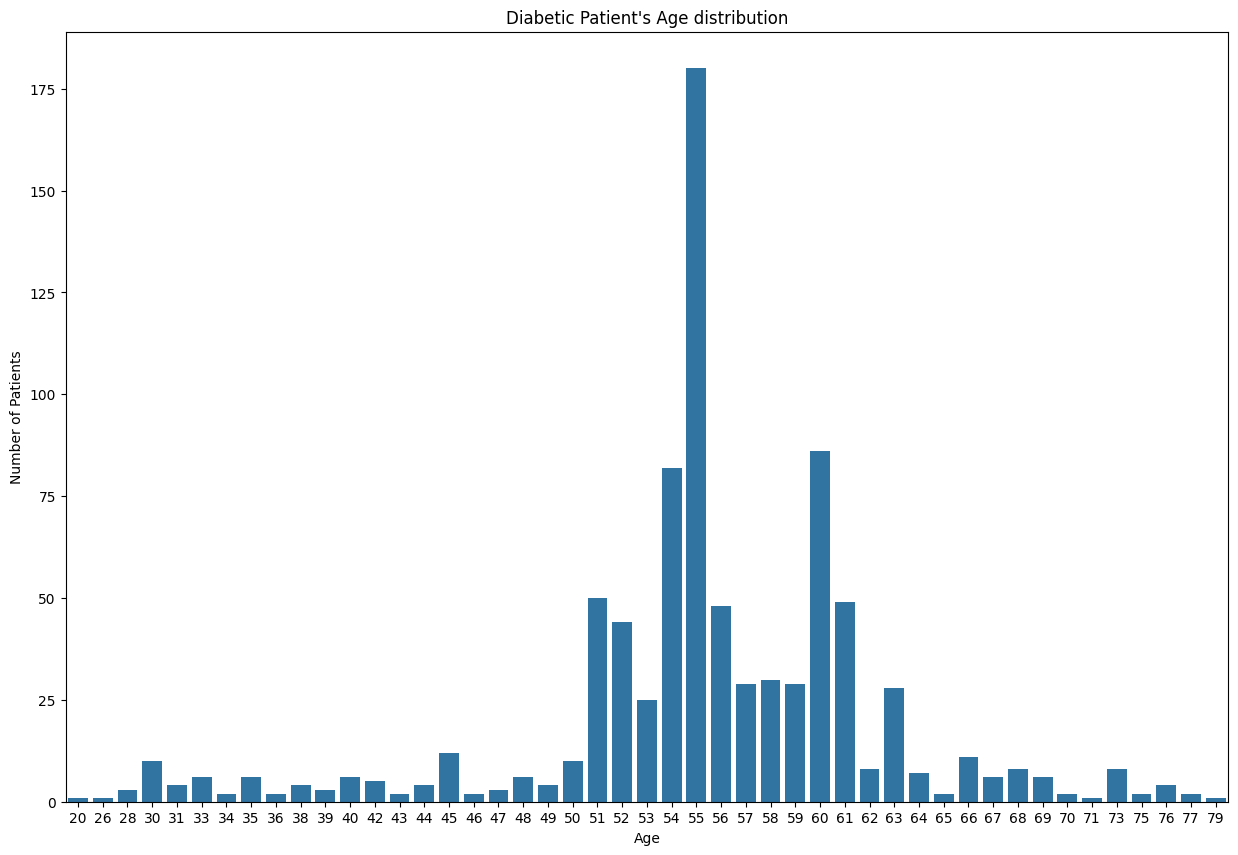

In [121]:
age_count = diabetic_patients['AGE'].value_counts()
age_count = age_count.sort_index()

plt.figure(figsize=(15, 10))
bax = sns.barplot(x=age_count.index, y=age_count.values)
plt.title("Diabetic Patient's Age distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Age")
plt.show()

## Model Building

In [122]:
X = df.drop('CLASS', axis=1)  # Features
y = df['CLASS']  # Target variable

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Classification Algorithms:**

**K Nearest Neighbour (KNN)**

In [124]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_pred, average='weighted'))

working on neighbors 2
working on neighbors 3
working on neighbors 4
working on neighbors 5
working on neighbors 6
working on neighbors 7
working on neighbors 8
working on neighbors 9
working on neighbors 10
working on neighbors 11
working on neighbors 12
working on neighbors 13
working on neighbors 14
working on neighbors 15
working on neighbors 16
working on neighbors 17
working on neighbors 18
working on neighbors 19


In [125]:
results_df = pd.DataFrame({
    'k': neighbors_settings,
    'Training Accuracy': training_accuracy,
    'Test Accuracy': test_accuracy,
    'Training F1 Score': training_f1,
    'Test F1 Score': test_f1
})

print(results_df)

best_k_accuracy = results_df.loc[results_df['Test Accuracy'].idxmax()]
print(f"\nBest k based on Test Accuracy: {best_k_accuracy['k']}")
print(f"Test Accuracy: {best_k_accuracy['Test Accuracy']}")
print(f"Training Accuracy: {best_k_accuracy['Training Accuracy']}")

best_k_f1 = results_df.loc[results_df['Test F1 Score'].idxmax()]
print(f"\nBest k based on Test F1 Score: {best_k_f1['k']}")
print(f"Test F1 Score: {best_k_f1['Test F1 Score']}")
print(f"Training F1 Score: {best_k_f1['Training F1 Score']}")


     k  Training Accuracy  Test Accuracy  Training F1 Score  Test F1 Score
0    2            0.90000          0.795           0.909521       0.815808
1    3            0.88750          0.860           0.881025       0.856264
2    4            0.87750          0.850           0.874846       0.853246
3    5            0.87750          0.875           0.868952       0.870631
4    6            0.87625          0.865           0.868044       0.862955
5    7            0.87375          0.880           0.860605       0.874531
6    8            0.86375          0.875           0.855023       0.871945
7    9            0.86750          0.885           0.854716       0.879932
8   10            0.86125          0.870           0.851648       0.867626
9   11            0.86125          0.870           0.848364       0.865702
10  12            0.85875          0.850           0.848273       0.848139
11  13            0.85500          0.850           0.841479       0.837011
12  14            0.85875

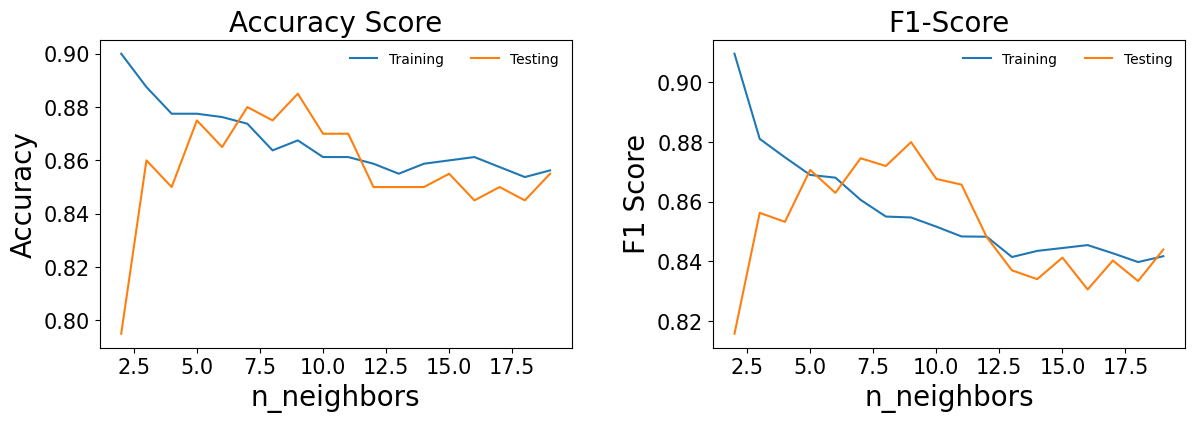

In [126]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20)
plt.legend(['Training','Testing'],frameon=False, ncol=2);

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20)
plt.legend(['Training','Testing'],frameon=False, ncol=2);

In [127]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.80      0.40      0.53        10
           2       0.93      0.95      0.94       169

    accuracy                           0.89       200
   macro avg       0.77      0.64      0.68       200
weighted avg       0.88      0.89      0.88       200



In [128]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)

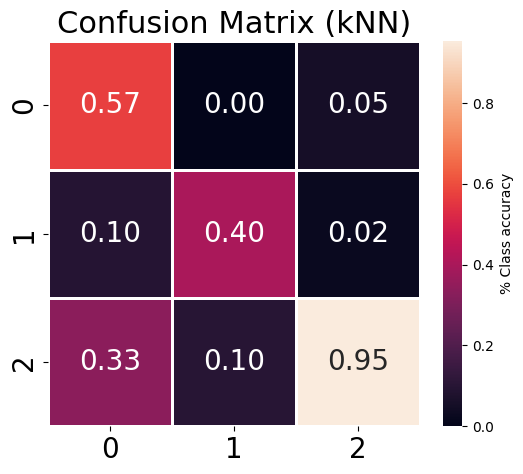

In [129]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

**Support Vector Machine (SVM)**

In [130]:
svc = SVC(C=1000, gamma='auto').fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.86      0.60      0.71        10
           2       0.98      0.99      0.99       169

    accuracy                           0.96       200
   macro avg       0.89      0.83      0.85       200
weighted avg       0.96      0.96      0.96       200



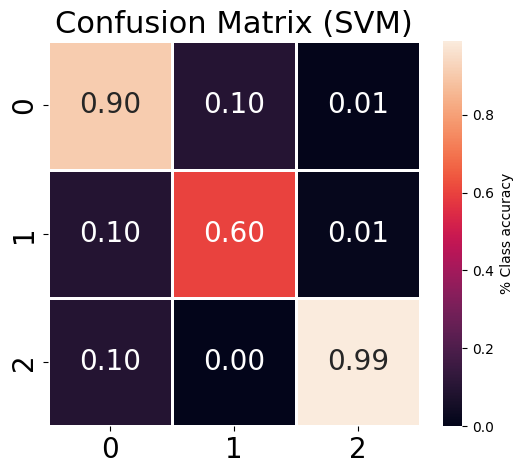

In [131]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

Decision Tree

In [132]:
max_depth=range(1,20)
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred,average='weighted'))
    test_f1.append(f1_score(y_test, y_pred,average='weighted'))

In [133]:
best_max_depth = pd.DataFrame({
    "Max Depth": max_depth,
    "Train Accuracy": training_accuracy,
    "Test Accuracy": test_accuracy,
    "Train F1": training_f1,
    "Test F1": test_f1
})

print(best_max_depth.to_string(index=False))

 Max Depth  Train Accuracy  Test Accuracy  Train F1  Test F1
         1         0.89125          0.905  0.876988 0.890492
         2         0.92500          0.940  0.927530 0.945016
         3         0.97375          0.980  0.973217 0.979408
         4         0.99375          0.995  0.993831 0.994876
         5         0.99750          0.990  0.997513 0.989837
         6         1.00000          0.990  1.000000 0.989837
         7         1.00000          0.990  1.000000 0.989837
         8         1.00000          0.990  1.000000 0.989837
         9         1.00000          0.990  1.000000 0.989837
        10         1.00000          0.990  1.000000 0.989837
        11         1.00000          0.990  1.000000 0.989837
        12         1.00000          0.990  1.000000 0.989837
        13         1.00000          0.990  1.000000 0.989837
        14         1.00000          0.990  1.000000 0.989837
        15         1.00000          0.990  1.000000 0.989837
        16         1.000

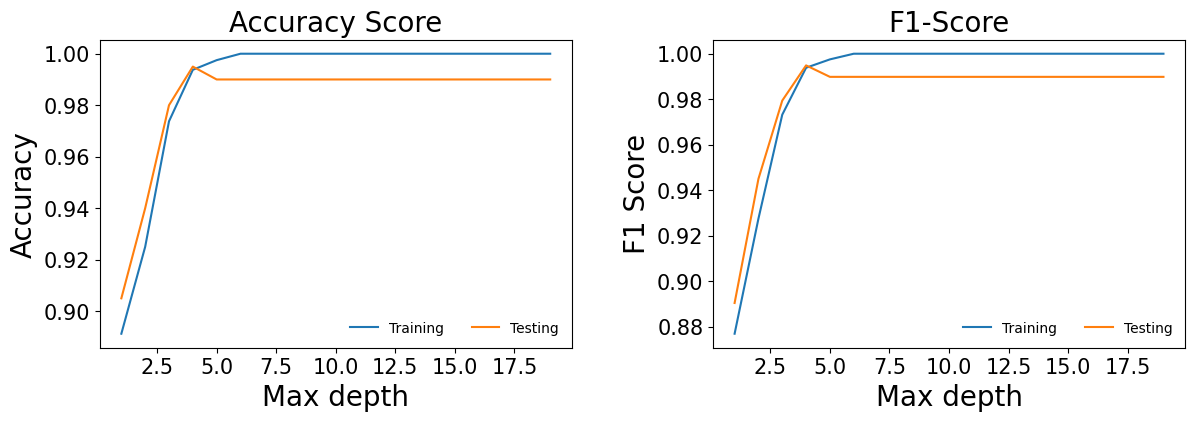

In [134]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20)
plt.legend(['Training','Testing'],frameon=False, ncol=2);

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20)
plt.legend(['Training','Testing'],frameon=False, ncol=2);

In [135]:
tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200



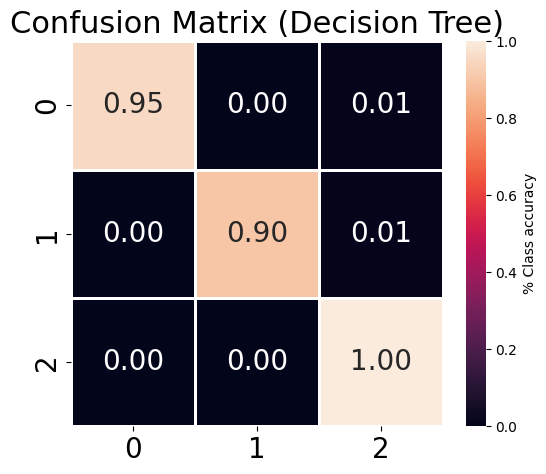

In [136]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

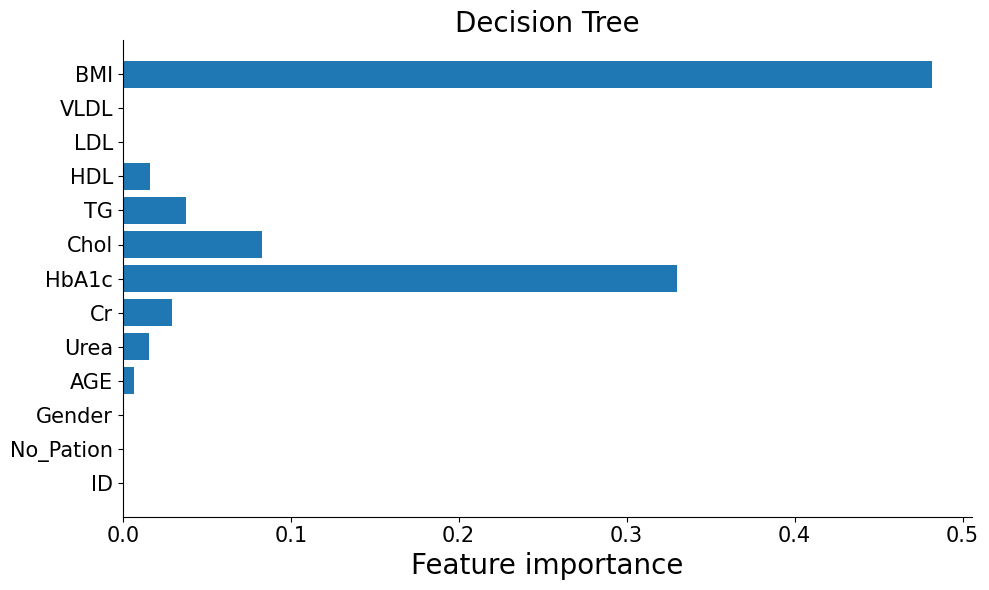

In [137]:
n_features = 13
plt.figure(figsize=(10,6))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns, size=15)
plt.xticks(size=15)
plt.xlabel('Feature importance', size=20)
# plt.ylabel('Feature', size=20)
plt.ylim(-1, n_features)
sns.despine(top=True)
plt.title('Decision Tree', size=20)
plt.tight_layout()

We can see that BMI is the most important feature followed by HbA1c.

**Logistic Regression**

In [138]:
logreg_cv = LogisticRegression(C=10, solver='lbfgs', max_iter=1000, class_weight='balanced')
cv_scores = cross_val_score(logreg_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy (5-fold):", cv_scores.mean())

logreg_cv.fit(X_train_scaled, y_train)
y_pred = logreg_cv.predict(X_test)

print(classification_report(y_test, y_pred,zero_division=0))

Cross-validation accuracy (5-fold): 0.905
              precision    recall  f1-score   support

           0       0.11      1.00      0.19        21
           1       0.00      0.00      0.00        10
           2       1.00      0.01      0.02       169

    accuracy                           0.12       200
   macro avg       0.37      0.34      0.07       200
weighted avg       0.86      0.12      0.04       200



/Users/sushantneopane/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [139]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

In [140]:
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Perform grid search with cross-validation
logreg_gs = GridSearchCV(logreg_model, parameters, cv=5)  
logreg_gs.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l2']})

In [141]:
print(f"Best Parameters: {logreg_gs.best_params_}")

y_pred = logreg_gs.predict(X_test_scaled)

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}


In [142]:
print('Classification Report (Logistic Regression):\n', classification_report(y_test, y_pred))

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.43      0.60      0.50        10
           2       0.98      0.96      0.97       169

    accuracy                           0.93       200
   macro avg       0.76      0.81      0.78       200
weighted avg       0.94      0.93      0.93       200



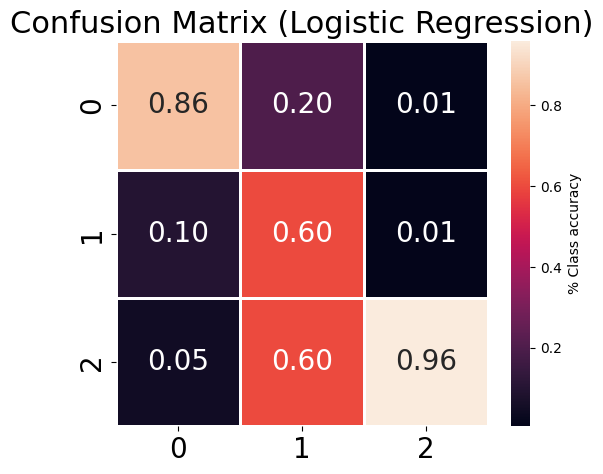

In [143]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

## **Clustering**

In [144]:
print(df)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1

In [145]:
df.drop(columns=['ID','No_Pation'])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [146]:
y_true = df["CLASS"]
X = df.drop(columns=["CLASS"])

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.672140,-0.074747,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
1,1.641852,-0.069940,0.877446,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239
2,0.330868,-0.065869,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
3,1.412950,-0.054126,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
4,0.680463,-0.069939,0.877446,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472


In [148]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

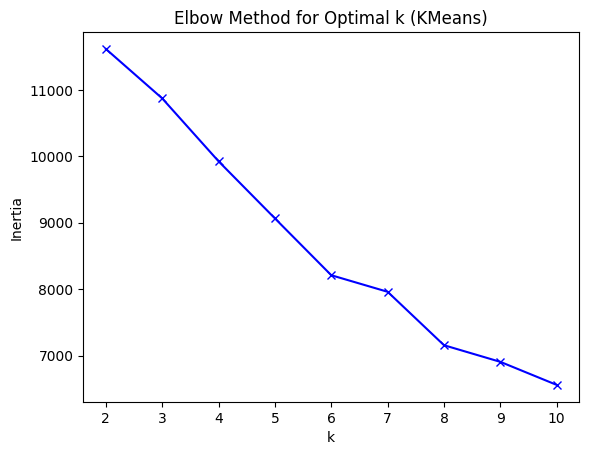

In [149]:
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (KMeans)')
plt.show()

KMeans Silhouette Score: 0.10340177510924843
KMeans Davies-Bouldin Score: 2.5834372263333667
KMeans Calinski-Harabasz Score: 97.61959399467135


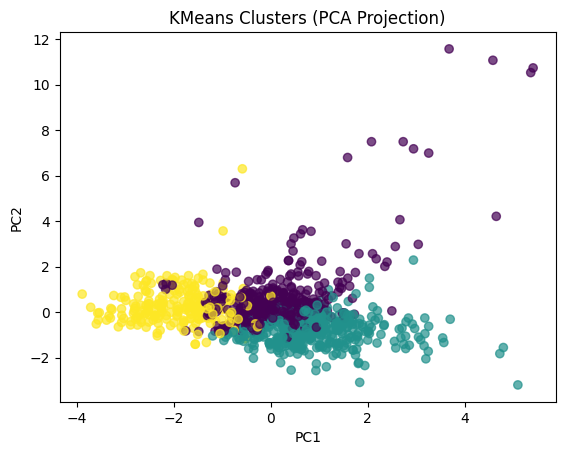

In [150]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

print("KMeans Silhouette Score:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin Score:", davies_bouldin_score(X_scaled, labels_kmeans))
print("KMeans Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels_kmeans))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Agglomerative Silhouette Score: 0.13819106205375598
Agglomerative Davies-Bouldin Score: 1.860549541466516
Agglomerative Calinski-Harabasz Score: 96.8464672225151


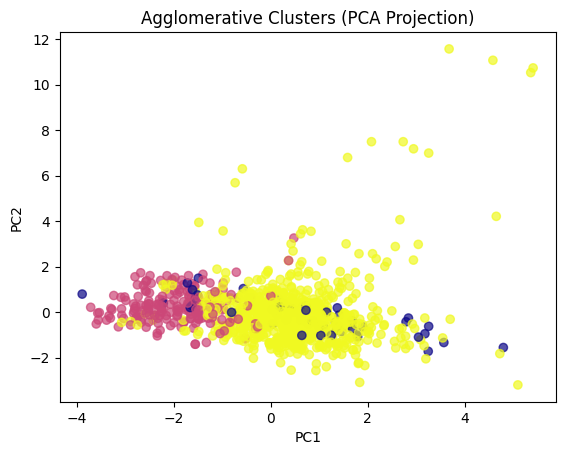

In [151]:
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, labels_agg))
print("Agglomerative Davies-Bouldin Score:", davies_bouldin_score(X_scaled, labels_agg))
print("Agglomerative Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels_agg))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg, cmap='plasma', alpha=0.7)
plt.title("Agglomerative Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Both K Means Clustering and Agglomerative Clustering perform poorly on the given dataset, based on the clustering evaluation metrics. This indicates that the dataset does not contain strong natural groupings. From the above visualizations, we can also see that there are tons of overlapped classes.

This suggests that unsupervised clustering may not be ideal for this dataset. Given that labels are available, the dataset is likely better suited for supervised learning approaches, where models can learn decision boundaries even in overlapping feature spaces.

# **Future Enhancements**
- More hyperparameter tuning
- More classifiers such as Random Forest, Gradient Boosting, XGBoost
- Perform feature selection/engineering to reduce noise and redundancy
- Apply dimensionality reduction for better seperation and visualization
- Generating a Tableau Dashboard